## Questions
Overarching: 
-How similar or different are field 2017 samples from lab 2018 samples?
-What ASVs are shared across all oysters?
-What ASVs are shared across all oysters and not found in mussels or clams?

Field(2017): 
-Is there any site effect?
-Are there ASVs associated with perkinsus infection? Associated with increasing perkinsus infection?
-Are there ASVs associated with presence of a pea crab?
-Are there ASVs associated with growth patterns?

Lab (2018): 
-How similar or different are the microbiomes of the four species? 
-What ASVs are uniquely shared between oysters in the polyculture treatments and mussels? 
-Are there ASVs associated with growth patterns?

Some ideas on how to look for differences:
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0237779

https://link.springer.com/article/10.1186/s12859-020-03803-z

Taking into account phylogeny:
https://www.frontiersin.org/articles/10.3389/fmicb.2018.01391/full



In [ ]:
#make everything underscores
asv_all=apply(asv_all, 2, function(x) gsub("-","_",x))
meta=apply(meta, 2, function(x) gsub("-","_",x))

In [ ]:
write.csv(asv_all, file="~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")

In [ ]:
write.csv(meta, file="~/Documents/DE_16S/DE16S_allmeta.csv")

In [234]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)
require(RColorBrewer)

Loading required package: RColorBrewer



In [131]:
meta=fread("~/Documents/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [132]:
#fix rownames
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [133]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
remove=negcounts[,colSums(negcounts)>0]
asv_all=asv_all[,!colnames(asv_all) %in% colnames(remove)]

In [135]:
#pull out the dilution effect samples
meta_de=meta[meta$Experiment=="Field17"|meta$Experiment=="Lab18",]

In [136]:
asv_de=asv_all[rownames(asv_all) %in% meta_de$UniqueID,]

In [138]:
NCOL(asv_all)

[1] 16364

In [139]:
asv_de=asv_de[,colSums(asv_de)>0]

In [140]:
NCOL(asv_de)

[1] 14743

In [141]:
#make taxa list that just applies to de samples
taxa_de=taxa[rownames(taxa)%in% colnames(asv_de),]

In [142]:
NROW(taxa_de)

[1] 14743

In [143]:
taxa_de=as.matrix(taxa_de)

In [145]:
meta_de=as.data.frame(meta_de)
row.names(meta_de)=meta_de$UniqueID

In [146]:
OTU = otu_table(t(asv_de), taxa_are_rows = TRUE)
TAX = tax_table(taxa_de)
SAMP=sample_data(meta_de)

In [147]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

# how similar are microbiomes across studies (field/lab, VA/MD, 2017/2018)

In [148]:
DE = phyloseq(OTU, TAX, SAMP)

In [221]:
DE.ord <- ordinate(DE, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.15949 
Run 1 stress 0.1828437 
Run 2 stress 0.1685279 
Run 3 stress 0.164325 
Run 4 stress 0.174856 
Run 5 stress 0.1688135 
Run 6 stress 0.1693291 
Run 7 stress 0.174893 
Run 8 stress 0.1712787 
Run 9 stress 0.1728834 
Run 10 stress 0.1733098 
Run 11 stress 0.1718775 
Run 12 stress 0.1730086 
Run 13 stress 0.1723951 
Run 14 stress 0.1692801 
Run 15 stress 0.1693783 
Run 16 stress 0.1719349 
Run 17 stress 0.1674027 
Run 18 stress 0.1709315 
Run 19 stress 0.1706822 
Run 20 stress 0.1732498 
Run 21 stress 0.1755239 
Run 22 stress 0.1753038 
Run 23 stress 0.1705716 
Run 24 stress 0.1811026 
Run 25 stress 0.1685508 
Run 26 stress 0.1807216 
Run 27 stress 0.1731708 
Run 28 stress 0.1682234 
Run 29 stress 0.1647153 
Run 30 stress 0.1700175 
Run 31 stress 0.1726452 
Run 32 stress 0.1667756 
Run 33 stress 0.168607 
Run 34 stress 0.1721174 
Run 35 stress 0.1604097 
Run 36 stress 0.1618527 
Run 37 stress 0.1723563 
Run 38

Run 319 stress 0.1800411 
Run 320 stress 0.1725109 
Run 321 stress 0.1759204 
Run 322 stress 0.1672148 
Run 323 stress 0.1743755 
Run 324 stress 0.1759295 
Run 325 stress 0.1730094 
Run 326 stress 0.1604393 
Run 327 stress 0.1726312 
Run 328 stress 0.1732376 
Run 329 stress 0.1740575 
Run 330 stress 0.1742022 
Run 331 stress 0.1769672 
Run 332 stress 0.1665948 
Run 333 stress 0.1712241 
Run 334 stress 0.1686442 
Run 335 stress 0.1740768 
Run 336 stress 0.1665865 
Run 337 stress 0.1703325 
Run 338 stress 0.173671 
Run 339 stress 0.1702335 
Run 340 stress 0.1709604 
Run 341 stress 0.1788632 
Run 342 stress 0.1684999 
Run 343 stress 0.1737678 
Run 344 stress 0.1688982 
Run 345 stress 0.1713578 
Run 346 stress 0.1717672 
Run 347 stress 0.1757731 
Run 348 stress 0.1707291 
Run 349 stress 0.1774078 
Run 350 stress 0.1674904 
Run 351 stress 0.1758061 
Run 352 stress 0.1757071 
Run 353 stress 0.1692901 
Run 354 stress 0.1675941 
Run 355 stress 0.1743105 
Run 356 stress 0.1727702 
Run 357 stres

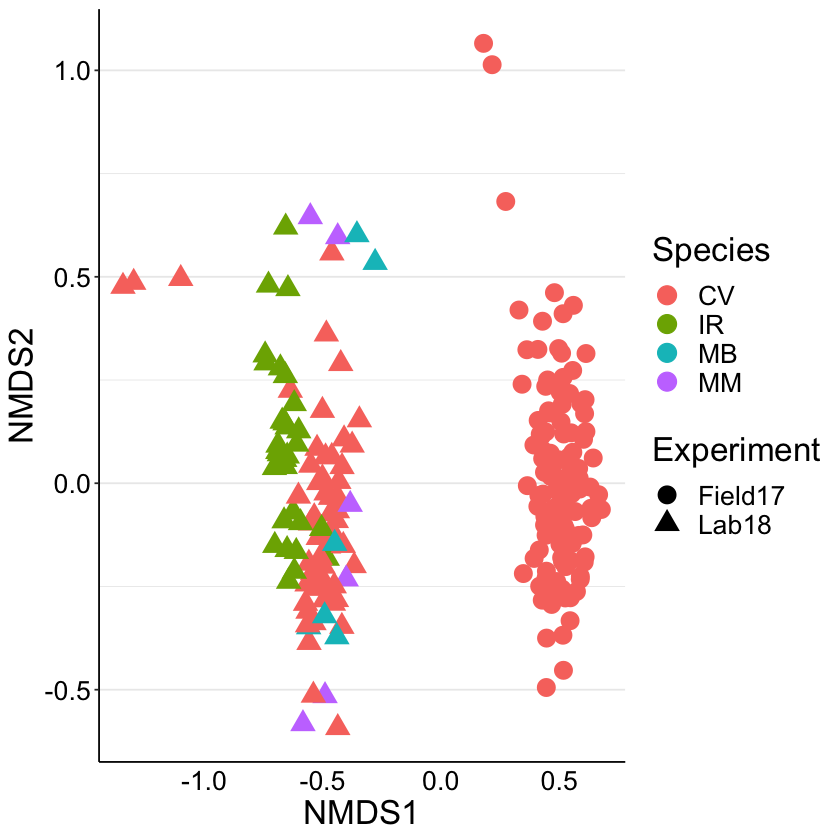

In [225]:
plot_ordination(DE, DE.ord, type="samples", color="Species", shape="Experiment")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [226]:
#top 100 taxa
DE_100 = prune_taxa(names(sort(taxa_sums(DE),TRUE)[1:100]), DE)

In [252]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(21)


In [253]:
mycolors

[1] "#1B9E77" "#5D874E" "#A07125" "#D35F0A" "#B16548" "#8D6B86" "#8068AE"
 [8] "#A850A0" "#D03792" "#D33B79" "#A66753" "#79932E" "#7FA718" "#ACA80E"
[15] "#D9AA04" "#D59D08" "#BF8B12" "#A9781B" "#927132" "#7C6B4C" "#666666"

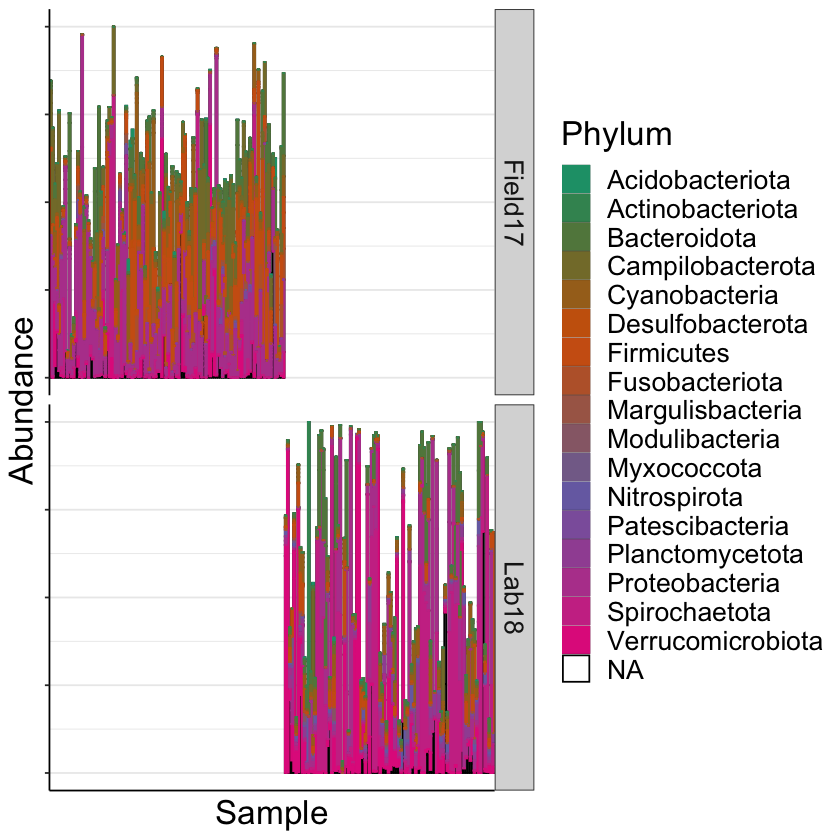

In [291]:
plot_bar(DE_100,  fill="Phylum") +
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
facet_grid(Experiment~., scales = "free_x")+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank(),
          text = element_text(size=20))

# 2018 Lab experiment

In [261]:
DE17=subset_samples(DE, Year=="2017")
DE18=subset_samples(DE, Year=="2018")

In [262]:
DE18CV=subset_samples(DE18, Species=="CV")
DE18M=subset_samples(DE18, Species=="MB"| Species=="MM")

In [162]:
DE18.ord <- ordinate(DE18, "NMDS", "bray", trymax=100)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1964036 
Run 1 stress 0.2023676 
Run 2 stress 0.1964058 
... Procrustes: rmse 0.0004155166  max resid 0.002971387 
... Similar to previous best
Run 3 stress 0.2178828 
Run 4 stress 0.2216422 
Run 5 stress 0.2217865 
Run 6 stress 0.2172413 
Run 7 stress 0.2080296 
Run 8 stress 0.2106232 
Run 9 stress 0.2059768 
Run 10 stress 0.1964215 
... Procrustes: rmse 0.002168015  max resid 0.01569979 
Run 11 stress 0.2315864 
Run 12 stress 0.2134551 
Run 13 stress 0.1968454 
... Procrustes: rmse 0.005826709  max resid 0.05063503 
Run 14 stress 0.1964236 
... Procrustes: rmse 0.002210464  max resid 0.01571606 
Run 15 stress 0.2276174 
Run 16 stress 0.1964236 
... Procrustes: rmse 0.002210786  max resid 0.01571472 
Run 17 stress 0.2208564 
Run 18 stress 0.2147555 
Run 19 stress 0.1964215 
... Procrustes: rmse 0.00216804  max resid 0.01571138 
Run 20 stress 0.2267285 
*** Solution reached


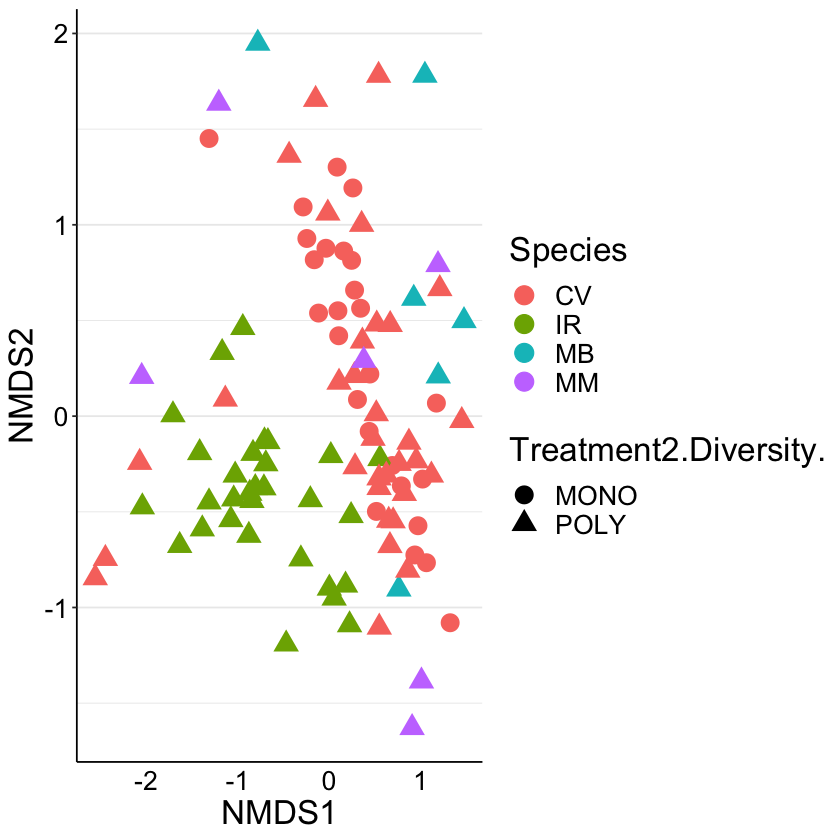

In [288]:
plot_ordination(DE18, DE18.ord, type="samples", color="Species", shape="Treatment2.Diversity.")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [199]:
DE18CV.ord <- ordinate(DE18CV, "NMDS", "bray", trymax=100)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1741218 
Run 1 stress 0.1630981 
... New best solution
... Procrustes: rmse 0.04541063  max resid 0.1128002 
Run 2 stress 0.1607378 
... New best solution
... Procrustes: rmse 0.0262269  max resid 0.1816371 
Run 3 stress 0.1642326 
Run 4 stress 0.1640652 
Run 5 stress 0.1699478 
Run 6 stress 0.1638104 
Run 7 stress 0.1795322 
Run 8 stress 0.1607379 
... Procrustes: rmse 2.533354e-05  max resid 0.0001627597 
... Similar to previous best
Run 9 stress 0.181756 
Run 10 stress 0.1729525 
Run 11 stress 0.1607377 
... New best solution
... Procrustes: rmse 3.757091e-05  max resid 0.0001414264 
... Similar to previous best
Run 12 stress 0.1796518 
Run 13 stress 0.1607377 
... Procrustes: rmse 1.213747e-05  max resid 4.306332e-05 
... Similar to previous best
Run 14 stress 0.1690882 
Run 15 stress 0.1640654 
Run 16 stress 0.1672922 
Run 17 stress 0.1607379 
... Procrustes: rmse 0.0001067844  max resid 0.0004006844 
... S

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


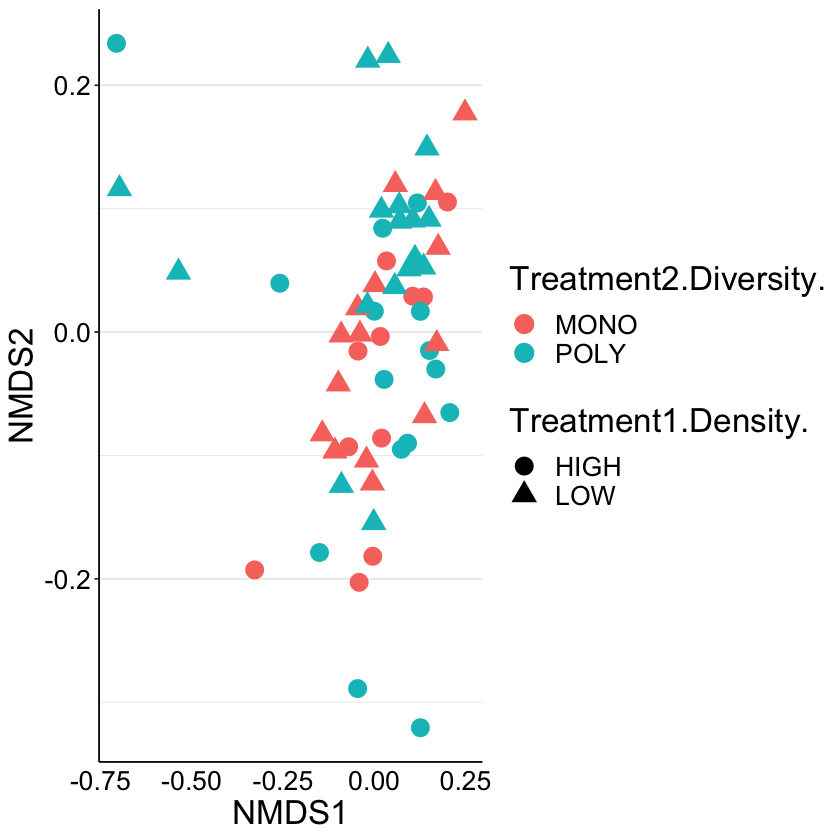

In [202]:
plot_ordination(DE18CV, DE18CV.ord, type="samples", color="Treatment2.Diversity.", shape="Treatment1.Density.")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [263]:
#top 100 taxa
DE18_100 = prune_taxa(names(sort(taxa_sums(DE18),TRUE)[1:100]), DE18)

In [285]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(39)

ERROR: Error in eval(expr, envir, enclos): object 'Samp' not found


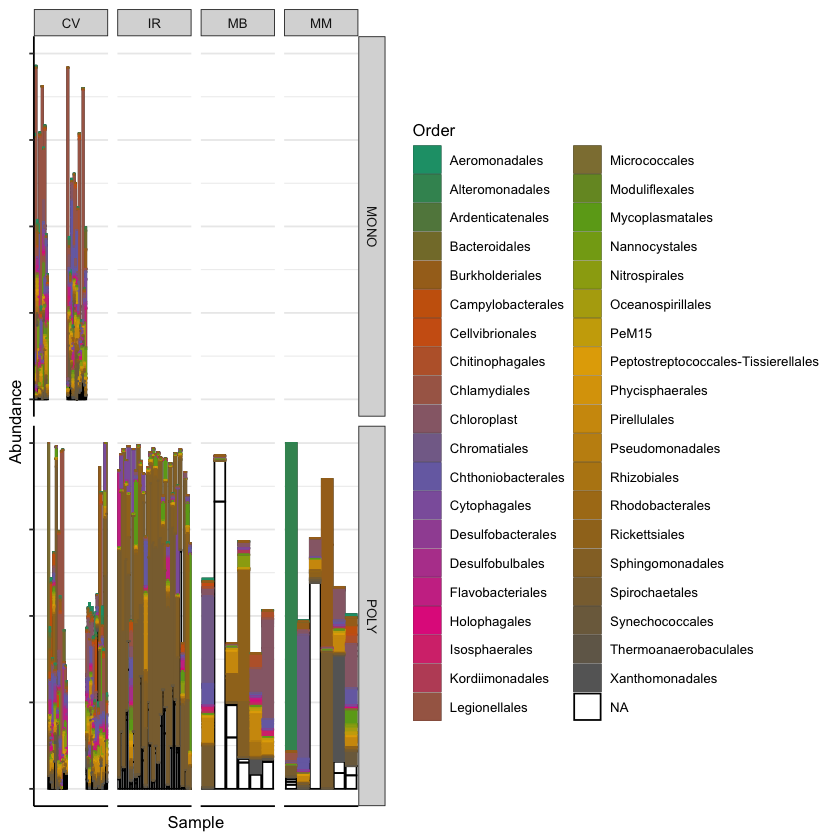

In [289]:
plot_bar(DE18_100,  fill="Order") +
facet_grid(Treatment2.Diversity.~Species, scales = "free_x")+
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
scale_fill_manual(values=mycolors, drop=TRUE)+
scale_color_manual(values=mycolors, drop=TRUE)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank(),
          text = element_text(size=10))

In [ ]:
#top 100 taxa
DE_100 = prune_taxa(names(sort(taxa_sums(DE),TRUE)[1:100]), DE)

In [216]:
DE17pos

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14743 taxa and 78 samples ]
sample_data() Sample Data:       [ 78 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 14743 taxa by 6 taxonomic ranks ]

In [218]:
DE17pos.ord <- ordinate(DE17pos, "NMDS", "jaccard", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.2529488 
Run 1 stress 0.2504103 
... New best solution
... Procrustes: rmse 0.04867207  max resid 0.1988074 
Run 2 stress 0.2530209 
Run 3 stress 0.2545586 
Run 4 stress 0.2505265 
... Procrustes: rmse 0.03909983  max resid 0.1753747 
Run 5 stress 0.2458588 
... New best solution
... Procrustes: rmse 0.05162306  max resid 0.1915237 
Run 6 stress 0.2576897 
Run 7 stress 0.2529135 
Run 8 stress 0.2457339 
... New best solution
... Procrustes: rmse 0.03359652  max resid 0.1928773 
Run 9 stress 0.2465999 
Run 10 stress 0.2458613 
... Procrustes: rmse 0.03350054  max resid 0.1936795 
Run 11 stress 0.2535001 
Run 12 stress 0.2463018 
Run 13 stress 0.2500126 
Run 14 stress 0.2468355 
Run 15 stress 0.2527082 
Run 16 stress 0.2499257 
Run 17 stress 0.2519933 
Run 18 stress 0.2499633 
Run 19 stress 0.2485331 
Run 20 stress 0.2500516 
Run 21 stress 0.2517647 
Run 22 stress 0.2454952 
... New best solution
... Procrustes: r

Run 260 stress 0.2467095 
Run 261 stress 0.2460375 
Run 262 stress 0.251166 
Run 263 stress 0.247671 
Run 264 stress 0.2603482 
Run 265 stress 0.2479107 
Run 266 stress 0.2481468 
Run 267 stress 0.2477027 
Run 268 stress 0.2482609 
Run 269 stress 0.2485506 
Run 270 stress 0.2518375 
Run 271 stress 0.2458067 
... Procrustes: rmse 0.01463655  max resid 0.07236861 
Run 272 stress 0.2497683 
Run 273 stress 0.2518998 
Run 274 stress 0.2506982 
Run 275 stress 0.2481304 
Run 276 stress 0.2485614 
Run 277 stress 0.2521908 
Run 278 stress 0.2510635 
Run 279 stress 0.2544715 
Run 280 stress 0.2524039 
Run 281 stress 0.2509123 
Run 282 stress 0.2478315 
Run 283 stress 0.2499806 
Run 284 stress 0.2512169 
Run 285 stress 0.2466047 
Run 286 stress 0.2490853 
Run 287 stress 0.2458579 
... Procrustes: rmse 0.008113017  max resid 0.04329867 
Run 288 stress 0.2464756 
Run 289 stress 0.2530604 
Run 290 stress 0.2480437 
Run 291 stress 0.2462258 
Run 292 stress 0.2459506 
... Procrustes: rmse 0.03001538  

Run 529 stress 0.2493343 
Run 530 stress 0.2524767 
Run 531 stress 0.2527152 
Run 532 stress 0.24864 
Run 533 stress 0.2539339 
Run 534 stress 0.254386 
Run 535 stress 0.2484132 
Run 536 stress 0.247845 
Run 537 stress 0.2459454 
... Procrustes: rmse 0.034047  max resid 0.1956863 
Run 538 stress 0.2509439 
Run 539 stress 0.2468554 
Run 540 stress 0.2476747 
Run 541 stress 0.2532138 
Run 542 stress 0.2525978 
Run 543 stress 0.2477712 
Run 544 stress 0.2487309 
Run 545 stress 0.24704 
Run 546 stress 0.2463541 
Run 547 stress 0.2518406 
Run 548 stress 0.2486412 
Run 549 stress 0.2539878 
Run 550 stress 0.2501637 
Run 551 stress 0.2457393 
... Procrustes: rmse 0.01145004  max resid 0.07321413 
Run 552 stress 0.2497689 
Run 553 stress 0.2468984 
Run 554 stress 0.2483222 
Run 555 stress 0.2530842 
Run 556 stress 0.2528903 
Run 557 stress 0.2528956 
Run 558 stress 0.2497834 
Run 559 stress 0.2528046 
Run 560 stress 0.2549527 
Run 561 stress 0.2481234 
Run 562 stress 0.247721 
Run 563 stress 0

Run 810 stress 0.2486538 
Run 811 stress 0.2511135 
Run 812 stress 0.2462995 
Run 813 stress 0.2486917 
Run 814 stress 0.2516516 
Run 815 stress 0.2509242 
Run 816 stress 0.253016 
Run 817 stress 0.2471972 
Run 818 stress 0.2465305 
Run 819 stress 0.2460579 
Run 820 stress 0.2468231 
Run 821 stress 0.2457875 
... Procrustes: rmse 0.01218833  max resid 0.07077235 
Run 822 stress 0.2491207 
Run 823 stress 0.2520611 
Run 824 stress 0.2554677 
Run 825 stress 0.2498692 
Run 826 stress 0.2488736 
Run 827 stress 0.2511179 
Run 828 stress 0.2454954 
... Procrustes: rmse 0.004388531  max resid 0.03079523 
Run 829 stress 0.2499697 
Run 830 stress 0.2458082 
... Procrustes: rmse 0.01282565  max resid 0.07298834 
Run 831 stress 0.2468988 
Run 832 stress 0.246965 
Run 833 stress 0.2459165 
... Procrustes: rmse 0.03380652  max resid 0.1956851 
Run 834 stress 0.2521059 
Run 835 stress 0.2461869 
Run 836 stress 0.2476026 
Run 837 stress 0.2529463 
Run 838 stress 0.2485856 
Run 839 stress 0.2455033 
..

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


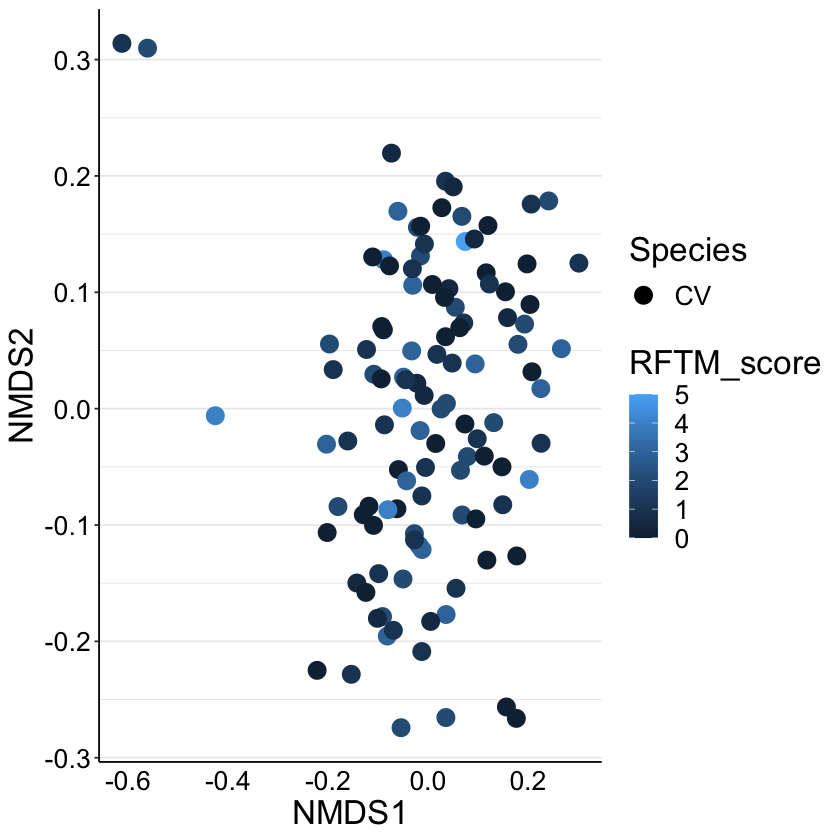

In [212]:
plot_ordination(DE17, DE17.ord, type="samples", color="RFTM_score", shape="Species")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [219]:
plot_bar(DE17,  fill="Phylum") +
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


In [177]:
DE17fr = filter_taxa(DE17, function(x) mean(x) > 1e-4, TRUE)

In [179]:
DE17

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14743 taxa and 112 samples ]
sample_data() Sample Data:       [ 112 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 14743 taxa by 6 taxonomic ranks ]

In [182]:
DE17.ord <- ordinate(DE17, "NMDS", "bray", trymax=500, k=3)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.2053962 
Run 1 stress 0.2059006 
Run 2 stress 0.2054423 
... Procrustes: rmse 0.02520182  max resid 0.1523051 
Run 3 stress 0.2050679 
... New best solution
... Procrustes: rmse 0.02680316  max resid 0.1878087 
Run 4 stress 0.2049808 
... New best solution
... Procrustes: rmse 0.02386176  max resid 0.1691491 
Run 5 stress 0.2059443 
Run 6 stress 0.2049386 
... New best solution
... Procrustes: rmse 0.005210018  max resid 0.02218895 
Run 7 stress 0.2093719 
Run 8 stress 0.2058115 
Run 9 stress 0.2053184 
... Procrustes: rmse 0.01758931  max resid 0.1646666 
Run 10 stress 0.2056054 
Run 11 stress 0.2054887 
Run 12 stress 0.2045945 
... New best solution
... Procrustes: rmse 0.01802224  max resid 0.1562649 
Run 13 stress 0.2091728 
Run 14 stress 0.2080094 
Run 15 stress 0.2049636 
... Procrustes: rmse 0.01695648  max resid 0.1561686 
Run 16 stress 0.2054128 
Run 17 stress 0.2058833 
Run 18 stress 0.2059114 
Run 19 

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [181]:
DE17fr.ord <- ordinate(DE17fr, "NMDS", "bray", trymax=500, k=3)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.2053962 
Run 1 stress 0.2142153 
Run 2 stress 0.2047169 
... New best solution
... Procrustes: rmse 0.02436506  max resid 0.1904315 
Run 3 stress 0.2060675 
Run 4 stress 0.2052413 
Run 5 stress 0.2068202 
Run 6 stress 0.2053633 
Run 7 stress 0.2072763 
Run 8 stress 0.2053561 
Run 9 stress 0.2053258 
Run 10 stress 0.2046152 
... New best solution
... Procrustes: rmse 0.00664891  max resid 0.06191317 
Run 11 stress 0.2067364 
Run 12 stress 0.2054399 
Run 13 stress 0.2079938 
Run 14 stress 0.2061578 
Run 15 stress 0.2070217 
Run 16 stress 0.2073315 
Run 17 stress 0.2056697 
Run 18 stress 0.2058653 
Run 19 stress 0.2046067 
... New best solution
... Procrustes: rmse 0.00455161  max resid 0.03695565 
Run 20 stress 0.2053974 
Run 21 stress 0.2061335 
Run 22 stress 0.208654 
Run 23 stress 0.206724 
Run 24 stress 0.2065802 
Run 25 stress 0.204592 
... New best solution
... Procrustes: rmse 0.003876994  max resid 0.03381

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


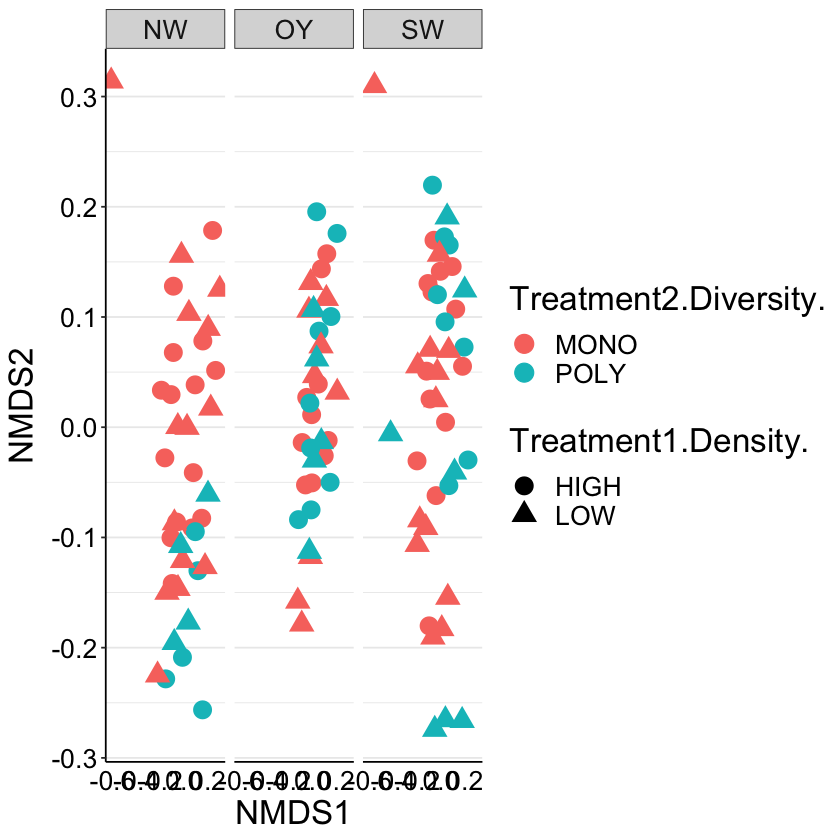

In [193]:
plot_ordination(DE17, DE17.ord, type="samples", shape="Treatment1.Density.", color="Treatment2.Diversity.")+ 
facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

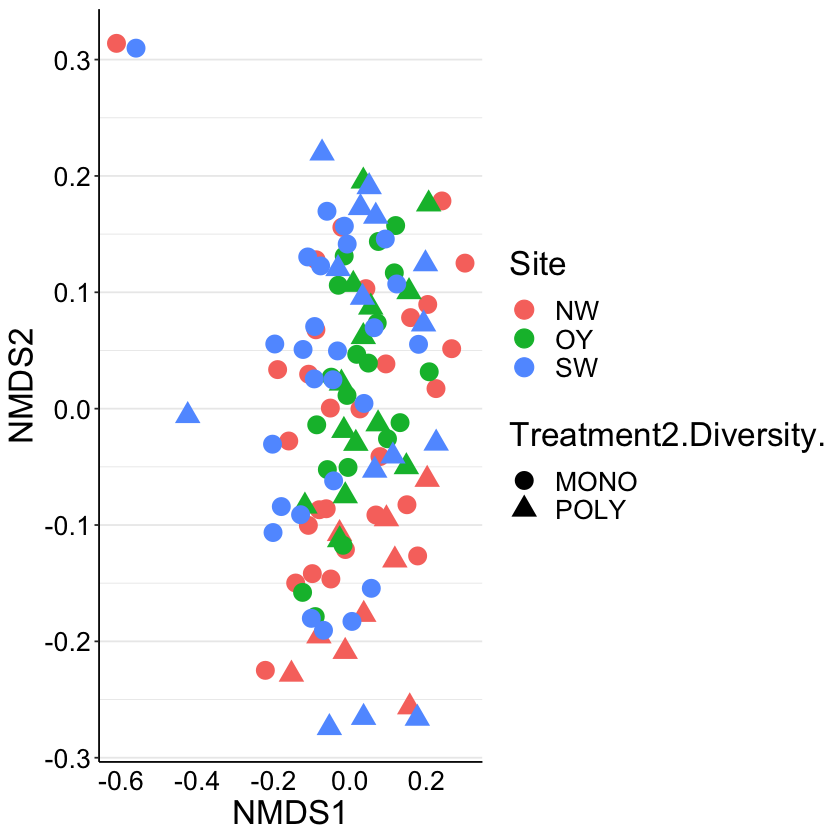

In [210]:
plot_ordination(DE17, DE17.ord, type="samples", shape="Treatment2.Diversity.", color="Site")+ 
#facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

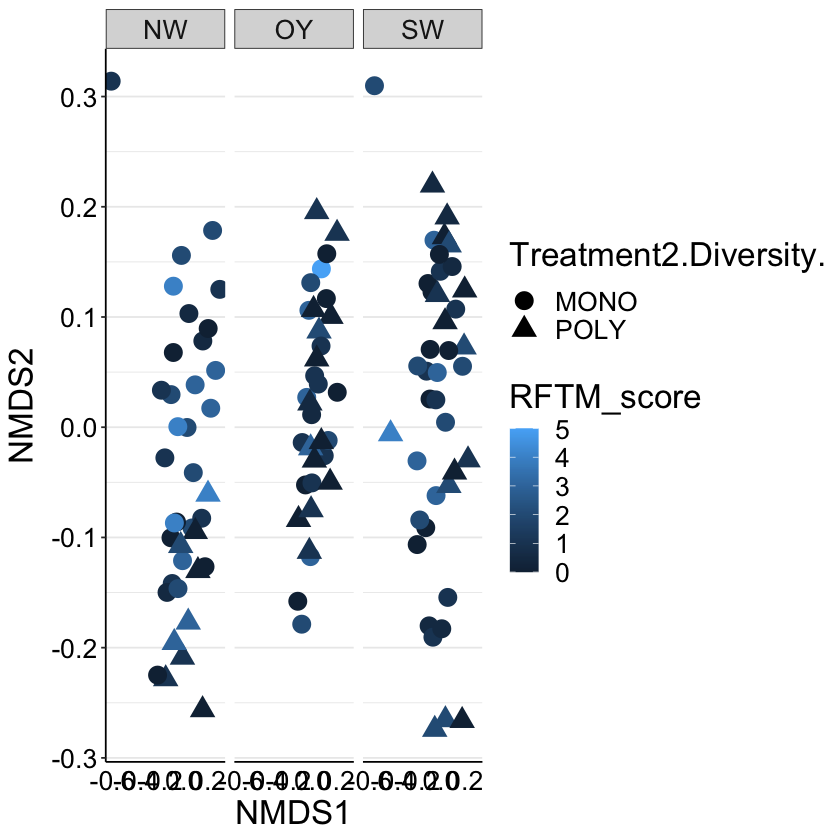

In [196]:
plot_ordination(DE17, DE17.ord, type="samples", color="RFTM_score", shape="Treatment2.Diversity.")+ 
facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))